# Fruits fresh and rotten for classification

1. introducció

Utiltzare la llibreria Keras de tensorflow per el tractament de les dades ja que tinc carpetes amb imatges en comptes de un csv com estaba habituat. Tensorflow no esta Suportat en la versió de python 3.11 per lo que he tingut que pasar a 3.10 per si voleu executar el codi vosaltres.

In [1]:
#llibreries a utilitzar
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn import metrics,neighbors
import seaborn as sns
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
TRAIN_PATH = 'data/dataset/train/'
TEST_PATH = 'data/dataset/test/'

In [4]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [21]:
#data augmentation
train=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test=ImageDataGenerator(rescale=1/255.0)


In [66]:
BATCH_SIZE=32
IMG_SHAPE=(240,240)
train_dataset = train.flow_from_directory(batch_size=BATCH_SIZE,directory=TEST_PATH,shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="training",class_mode='categorical')
val_dataset = train.flow_from_directory(batch_size=BATCH_SIZE,directory=TEST_PATH,shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="validation",class_mode='categorical')

Found 2430 images belonging to 6 classes.
Found 268 images belonging to 6 classes.


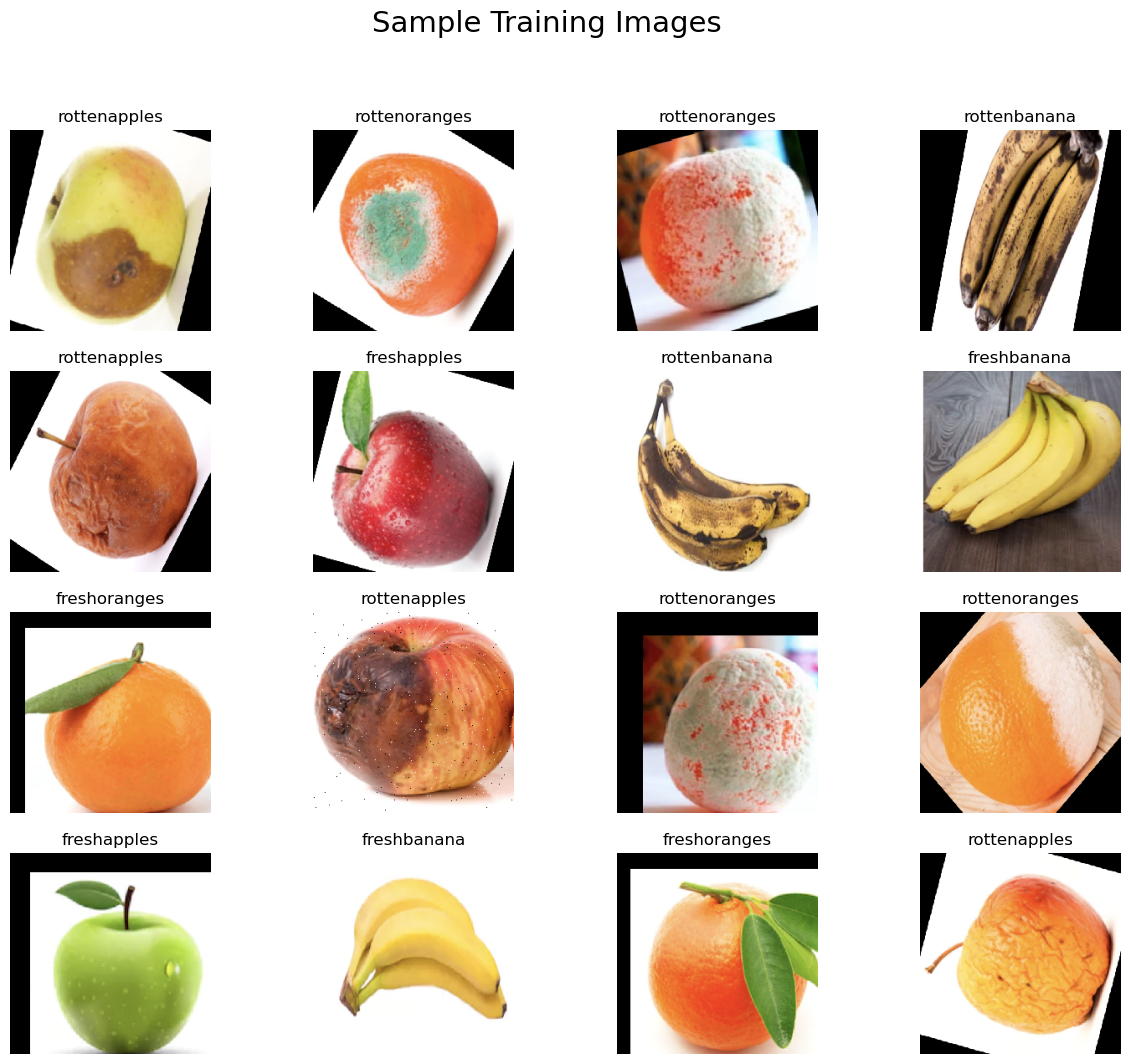

In [70]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
idx = 0
for i in range(4):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

Un cop hem llegit les dades veiem que en train_dataset[X][0] tenim els valors de les imatges per tal de ser impresas amb plt, en train_dataset[X][1] un array que ens indica a quina clase / carpeta pertany la fruita en questió provare les dades amb la carpeta test per tal de prevenir un cas de overflow ja que hi ha 10000 imatges en train y 2500 nomes en test. La

In [59]:
xd=0
for i in train_dataset

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0.